In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Activation, Dropout, Dense, LeakyReLU
from tensorflow.keras import Sequential

In [2]:
file='stress_summary.csv'
dfstress=pd.read_csv(file)
dfstress.head(60)

,jobid,xcoord,ycoord,zcoord,Mises
0,model0000,1.630270,3.971707,0.0,20.152510
1,model0000,3.434100,2.427200,0.0,1388.121094
2,model0000,2.441423,2.720675,0.0,2241.091187
3,model0000,1.608500,4.252800,0.0,23.529718
4,model0000,2.347765,2.785594,0.0,2152.505615
5,model0000,2.170310,2.935359,0.0,1924.460693
6,model0000,2.006892,3.114427,0.0,1557.437622
7,model0000,1.863280,3.322564,0.0,1086.631836
8,model0000,1.743743,3.563228,0.0,579.471497
9,model0000,1.657659,3.831999,0.0,158.700058


In [3]:
df_models=pd.read_csv('model_definitions.csv')

#landing spots for stresses: stress_i
for i in range(1,51):
    df_models['Stress_'+str(i)]=''

df_models.set_index('jobid', inplace=True)
df_models.head()

,L1,L2,L3,L5,R1,R2,Stress_1,Stress_2,Stress_3,Stress_4,...,Stress_41,Stress_42,Stress_43,Stress_44,Stress_45,Stress_46,Stress_47,Stress_48,Stress_49,Stress_50
jobid,,,,,,,,,,,,,,,,,,,,,
model0000,4.2528,5.1383,2.4272,1.6085,1.8256,0.3057,,,,,...,,,,,,,,,,
model0001,5.3116,5.5728,3.0138,3.2057,2.2978,0.4890,,,,,...,,,,,,,,,,
model0002,4.4968,5.8491,1.6841,2.3112,2.8127,0.6249,,,,,...,,,,,,,,,,
model0003,3.7086,7.1149,1.5794,3.7253,2.1292,0.4466,,,,,...,,,,,,,,,,
model0004,5.3247,7.1854,2.4957,3.0047,2.8290,0.5229,,,,,...,,,,,,,,,,


In [4]:
jobs=dfstress['jobid'].unique().tolist()
len(jobs)

1987

In [5]:
#Normalize stresses
#Iterating over jobs that ran
for job in jobs:
#     job=jobs[25]

    xcoords=dfstress[dfstress['jobid']==job].xcoord.to_numpy()
    ycoords=dfstress[dfstress['jobid']==job].ycoord.to_numpy()
    mises=dfstress[dfstress['jobid']==job].Mises.to_numpy()

    #90° fillet, find center and transfer to local coordinates
    cy = ycoords.max()
    ylocal=ycoords-cy

    #Normalized angle, [0, 1] starting at 9 o'clock, going to 6 o'clock ccw
    angle = np.arcsin(ylocal/ylocal.min()) / np.arcsin(ylocal/ylocal.min()).max()

    #Fit interpolator
    finterp=interpolate.interp1d(angle, mises)

    #Interpolation to regular spacing
    xnew = np.linspace(0,1,50)
    misesnorm = finterp(xnew)

    #store in dataframe
    for i in range(1,51):
        df_models.at[job,'Stress_'+str(i)]=misesnorm[i-1]

In [6]:
#Prune rows for jobs that failed
failed = df_models[df_models['Stress_1']==''].index.tolist()

df_models=df_models.drop(failed)
df_models.shape

(1987, 56)

In [7]:
df_models

,L1,L2,L3,L5,R1,R2,Stress_1,Stress_2,Stress_3,Stress_4,...,Stress_41,Stress_42,Stress_43,Stress_44,Stress_45,Stress_46,Stress_47,Stress_48,Stress_49,Stress_50
jobid,,,,,,,,,,,,,,,,,,,,,
model0000,4.2528,5.1383,2.4272,1.6085,1.8256,0.3057,23.529718,17.730298,11.930878,12.136787,...,2099.970311,2035.109431,1973.171576,1922.56555,1871.959524,1779.976505,1681.536578,1583.43523,1485.778162,1388.121094
model0001,5.3116,5.5728,3.0138,3.2057,2.2978,0.4890,5.366093,6.829893,8.766377,11.552894,...,595.356608,551.646422,512.945071,478.763556,444.30257,408.874845,373.44712,338.731358,304.466723,270.202087
model0002,4.4968,5.8491,1.6841,2.3112,2.8127,0.6249,7.120917,11.136511,16.918018,23.332656,...,2425.518732,2325.531773,2239.34693,2153.238167,2031.750377,1860.225123,1688.699869,1521.509675,1356.11525,1190.720825
model0003,3.7086,7.1149,1.5794,3.7253,2.1292,0.4466,24.54808,19.404988,15.641113,19.373392,...,3436.232794,3343.455392,3256.688321,3185.774726,3114.861131,2953.031544,2781.809668,2611.226312,2441.413388,2271.600464
model0004,5.3247,7.1854,2.4957,3.0047,2.8290,0.5229,9.931025,10.56845,11.92345,14.161868,...,1709.024058,1668.515757,1597.118087,1525.533545,1460.864169,1392.481068,1295.881905,1199.270029,1102.452306,1005.634583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
model1996,6.2109,6.5118,3.8780,3.0277,2.3329,0.6339,7.702959,7.591956,7.75715,8.895642,...,754.141916,717.229293,677.680463,640.219491,605.184103,569.04192,529.256189,489.412816,449.132181,408.851547
model1997,6.2529,6.2039,3.9082,2.3457,2.3447,0.5533,8.612778,7.836894,7.061009,7.885369,...,865.763315,840.777609,800.175449,759.57329,724.218761,689.002715,644.898089,599.706719,554.320754,508.923584
model1998,6.4834,7.9940,3.3131,4.3236,3.1703,0.6777,7.168422,6.897297,6.978667,7.790283,...,732.236858,687.866629,639.077743,591.727518,546.147819,502.120368,463.053584,425.17412,396.069139,366.964157


In [8]:
#Calculate ligament thickness

def ligament(row):
    dx = row['R1'] #L5+R1-L5
    dy = row['L1'] - 0.5 * row['L3']
    
    return np.sqrt(dx**2 + dy**2)


df_models['ligament'] = df_models[['L1', 'L2', 'L3', 'L5', 'R1', 'R2']].apply(ligament, axis=1)
df_models.head()

,L1,L2,L3,L5,R1,R2,Stress_1,Stress_2,Stress_3,Stress_4,...,Stress_42,Stress_43,Stress_44,Stress_45,Stress_46,Stress_47,Stress_48,Stress_49,Stress_50,ligament
jobid,,,,,,,,,,,,,,,,,,,,,
model0000,4.2528,5.1383,2.4272,1.6085,1.8256,0.3057,23.529718,17.730298,11.930878,12.136787,...,2035.109431,1973.171576,1922.56555,1871.959524,1779.976505,1681.536578,1583.43523,1485.778162,1388.121094,3.545356
model0001,5.3116,5.5728,3.0138,3.2057,2.2978,0.4890,5.366093,6.829893,8.766377,11.552894,...,551.646422,512.945071,478.763556,444.30257,408.874845,373.44712,338.731358,304.466723,270.202087,4.444730
model0002,4.4968,5.8491,1.6841,2.3112,2.8127,0.6249,7.120917,11.136511,16.918018,23.332656,...,2325.531773,2239.34693,2153.238167,2031.750377,1860.225123,1688.699869,1521.509675,1356.11525,1190.720825,4.611776
model0003,3.7086,7.1149,1.5794,3.7253,2.1292,0.4466,24.54808,19.404988,15.641113,19.373392,...,3343.455392,3256.688321,3185.774726,3114.861131,2953.031544,2781.809668,2611.226312,2441.413388,2271.600464,3.612959
model0004,5.3247,7.1854,2.4957,3.0047,2.8290,0.5229,9.931025,10.56845,11.92345,14.161868,...,1668.515757,1597.118087,1525.533545,1460.864169,1392.481068,1295.881905,1199.270029,1102.452306,1005.634583,4.962252


In [9]:
#Additional feature(s)
#Length from fillet to free end
df_models['L4']=df_models['L2']-df_models['L5']-df_models['R1']

#L3/L1 ratio
df_models['L3L1']=df_models['L3']/df_models['L1']

#R1/L1 ratio
df_models['R1L1']=df_models['R1']/df_models['L1']

df_models.head()

,L1,L2,L3,L5,R1,R2,Stress_1,Stress_2,Stress_3,Stress_4,...,Stress_45,Stress_46,Stress_47,Stress_48,Stress_49,Stress_50,ligament,L4,L3L1,R1L1
jobid,,,,,,,,,,,,,,,,,,,,,
model0000,4.2528,5.1383,2.4272,1.6085,1.8256,0.3057,23.529718,17.730298,11.930878,12.136787,...,1871.959524,1779.976505,1681.536578,1583.43523,1485.778162,1388.121094,3.545356,1.7042,0.570730,0.429270
model0001,5.3116,5.5728,3.0138,3.2057,2.2978,0.4890,5.366093,6.829893,8.766377,11.552894,...,444.30257,408.874845,373.44712,338.731358,304.466723,270.202087,4.444730,0.0693,0.567400,0.432600
model0002,4.4968,5.8491,1.6841,2.3112,2.8127,0.6249,7.120917,11.136511,16.918018,23.332656,...,2031.750377,1860.225123,1688.699869,1521.509675,1356.11525,1190.720825,4.611776,0.7252,0.374511,0.625489
model0003,3.7086,7.1149,1.5794,3.7253,2.1292,0.4466,24.54808,19.404988,15.641113,19.373392,...,3114.861131,2953.031544,2781.809668,2611.226312,2441.413388,2271.600464,3.612959,1.2604,0.425875,0.574125
model0004,5.3247,7.1854,2.4957,3.0047,2.8290,0.5229,9.931025,10.56845,11.92345,14.161868,...,1460.864169,1392.481068,1295.881905,1199.270029,1102.452306,1005.634583,4.962252,1.3517,0.468702,0.531298


In [10]:
columns = df_models.columns.tolist()

inputcols=[]
outputcols=[]
for col in columns:
    if 'Stress' in col:
        outputcols.append(col)
    else:
        inputcols.append(col)
        

In [11]:
#Extract from dataframe to arrays
inputs = df_models[inputcols].to_numpy().astype(np.float32)
outputs = df_models[outputcols].to_numpy().astype(np.float32)

In [12]:
#Test train split w/ 80% training, 10% validation, 10% test
inputs_train, inputs_remain, outputs_train, outputs_remain = train_test_split(inputs, outputs, test_size=0.2, random_state=19)
inputs_test, inputs_val, outputs_test, outputs_val = train_test_split(inputs_remain, outputs_remain, test_size=0.5, random_state=37)

In [13]:
#Scale to range [0,1] on Train data, transform Val and Test to prevent leakage
#Inputs
in_scaler = MinMaxScaler()
inputs_train = in_scaler.fit_transform(inputs_train)
inputs_test = in_scaler.transform(inputs_test)
inputs_val = in_scaler.transform(inputs_val)

#Outputs
out_scaler = MinMaxScaler()
outputs_train = out_scaler.fit_transform(outputs_train)
outputs_test = out_scaler.transform(outputs_test)
outputs_val = out_scaler.transform(outputs_val)

In [14]:
inputs_train.shape[1], outputs_train.shape[1]

(10, 50)

In [15]:
#Neural Network construction
input_size = inputs_train.shape[1]
output_size = outputs_train.shape[1]

#Number of Neurons in hidden layers (multiplier may be applied)
n_neurons=512

#Leaky activation function, if needed
leaky=LeakyReLU(alpha=0.1)

#Activation
act=leaky

#Fully-connected NN with Dense layers and Softmax activation for Class probabilties
model=Sequential([
    Dense(n_neurons, activation=act, input_shape=(input_size,)),
    Dropout(0.4),
    Dense(4*n_neurons, activation=act),
    Dropout(0.4),
    Dense(4*n_neurons, activation=act),
    Dropout(0.4),
    Dense(2*n_neurons, activation=act),
    Dropout(0.4),
    Dense(n_neurons, activation=act),
    Dropout(0.4),
    Dense(output_size),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2048)              1050624   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              2

In [16]:
#Define Optimizer and Loss
#Learning Rate Decay used with Adam optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.001)


#Compile model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [17]:
#learning rate decay
def lr_exp_decay(epoch, lr):
    
    #Start decay after specified epochs where default training rate is effective
    start=30
    if epoch > start:
        k = 0.00005
        lr=1.0 * lr * np.exp(-k*(epoch-start))
        #maintain minimum learning rate
        if lr<0.0005:
            lr=0.0005
    else:
        lr=0.001

    return lr

In [18]:
#Model callbacks
#Save best weights
checkpoint=tf.keras.callbacks.ModelCheckpoint('Stress_ANN.h5', save_best_only=True)

#Early stopping if Validation loss does not improve after specified epochs
es=tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

#Learning rate decay - smaller steps as loss gradients are smaller
learningrate_cb = tf.keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)

In [19]:
#Train the model
history=model.fit(inputs_train, outputs_train, epochs=200, 
                  validation_data=[inputs_val, outputs_val], 
                  callbacks=[checkpoint, learningrate_cb])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/200
50/50 [==============================] - 4s 59ms/step - loss: 0.0135 - accuracy: 0.0824 - val_loss: 0.0071 - val_accuracy: 0.2764 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/200
50/50 [==============================] - 3s 55ms/step - loss: 0.0057 - accuracy: 0.1466 - val_loss: 0.0042 - val_accuracy: 0.2764 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/200
50/50 [==============================] - 3s 56ms/step - loss: 0.0048 - accuracy: 0.1454 - val_loss: 0.0029 - val_accuracy: 0.3618 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/200
50/50 [==============================] - 3s 58ms/step - loss: 0.0039 - accuracy: 0.1875 - val_loss: 0.0019 - val_accuracy: 0.3518 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/200
50/50 [==============================] - 3s 57ms

50/50 [==============================] - 3s 53ms/step - loss: 0.0026 - accuracy: 0.3008 - val_loss: 0.0017 - val_accuracy: 0.2864 - lr: 9.9895e-04

Epoch 38: LearningRateScheduler setting learning rate to 0.0009986011082271694.
Epoch 38/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0021 - accuracy: 0.2813 - val_loss: 0.0016 - val_accuracy: 0.4171 - lr: 9.9860e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.0009982017240186632.
Epoch 39/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0023 - accuracy: 0.2769 - val_loss: 0.0018 - val_accuracy: 0.4673 - lr: 9.9820e-04

Epoch 40: LearningRateScheduler setting learning rate to 0.000997752690272953.
Epoch 40/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0022 - accuracy: 0.3159 - val_loss: 0.0012 - val_accuracy: 0.3970 - lr: 9.9775e-04

Epoch 41: LearningRateScheduler setting learning rate to 0.0009972538980830249.
Epoch 41/200
50/50 [==============================

50/50 [==============================] - 3s 53ms/step - loss: 0.0017 - accuracy: 0.3543 - val_loss: 0.0012 - val_accuracy: 0.4121 - lr: 9.5983e-04

Epoch 72: LearningRateScheduler setting learning rate to 0.0009578637343515725.
Epoch 72/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0024 - accuracy: 0.3493 - val_loss: 0.0022 - val_accuracy: 0.3166 - lr: 9.5786e-04

Epoch 73: LearningRateScheduler setting learning rate to 0.000955854351320083.
Epoch 73/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0023 - accuracy: 0.3436 - val_loss: 0.0012 - val_accuracy: 0.3920 - lr: 9.5585e-04

Epoch 74: LearningRateScheduler setting learning rate to 0.000953801488675377.
Epoch 74/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0018 - accuracy: 0.3675 - val_loss: 0.0011 - val_accuracy: 0.3769 - lr: 9.5380e-04

Epoch 75: LearningRateScheduler setting learning rate to 0.0009517054433529074.
Epoch 75/200
50/50 [==============================]

Epoch 105/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0016 - accuracy: 0.4003 - val_loss: 0.0012 - val_accuracy: 0.3116 - lr: 8.7045e-04

Epoch 106: LearningRateScheduler setting learning rate to 0.000867187568364966.
Epoch 106/200
50/50 [==============================] - 3s 54ms/step - loss: 0.0016 - accuracy: 0.3826 - val_loss: 0.0014 - val_accuracy: 0.3166 - lr: 8.6719e-04

Epoch 107: LearningRateScheduler setting learning rate to 0.0008638985097909345.
Epoch 107/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0016 - accuracy: 0.3870 - val_loss: 9.9454e-04 - val_accuracy: 0.3970 - lr: 8.6390e-04

Epoch 108: LearningRateScheduler setting learning rate to 0.0008605788724788039.
Epoch 108/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0018 - accuracy: 0.3870 - val_loss: 0.0010 - val_accuracy: 0.3417 - lr: 8.6058e-04

Epoch 109: LearningRateScheduler setting learning rate to 0.0008572291248885739.
Epoch 109/200
50/50 [====


Epoch 139: LearningRateScheduler setting learning rate to 0.0007450527357211383.
Epoch 139/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0016 - accuracy: 0.4141 - val_loss: 0.0014 - val_accuracy: 0.3869 - lr: 7.4505e-04

Epoch 140: LearningRateScheduler setting learning rate to 0.0007410032701288546.
Epoch 140/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0015 - accuracy: 0.3606 - val_loss: 0.0012 - val_accuracy: 0.4372 - lr: 7.4100e-04

Epoch 141: LearningRateScheduler setting learning rate to 0.0007369389250735128.
Epoch 141/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0019 - accuracy: 0.4110 - val_loss: 0.0013 - val_accuracy: 0.4523 - lr: 7.3694e-04

Epoch 142: LearningRateScheduler setting learning rate to 0.0007328602237867817.
Epoch 142/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0017 - accuracy: 0.3870 - val_loss: 0.0012 - val_accuracy: 0.4422 - lr: 7.3286e-04

Epoch 143: LearningRateSche

50/50 [==============================] - 3s 53ms/step - loss: 0.0014 - accuracy: 0.4078 - val_loss: 9.2968e-04 - val_accuracy: 0.4322 - lr: 6.0620e-04

Epoch 173: LearningRateScheduler setting learning rate to 0.0006019082351667981.
Epoch 173/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0015 - accuracy: 0.4059 - val_loss: 0.0015 - val_accuracy: 0.3668 - lr: 6.0191e-04

Epoch 174: LearningRateScheduler setting learning rate to 0.0005976199551808102.
Epoch 174/200
50/50 [==============================] - 3s 53ms/step - loss: 0.0017 - accuracy: 0.3870 - val_loss: 0.0011 - val_accuracy: 0.4271 - lr: 5.9762e-04

Epoch 175: LearningRateScheduler setting learning rate to 0.0005933325648279723.
Epoch 175/200
50/50 [==============================] - 3s 54ms/step - loss: 0.0015 - accuracy: 0.3990 - val_loss: 9.2223e-04 - val_accuracy: 0.4573 - lr: 5.9333e-04

Epoch 176: LearningRateScheduler setting learning rate to 0.0005890464685171978.
Epoch 176/200
50/50 [=============

In [20]:
model.evaluate(inputs_test, outputs_test)

7/7 [==============================] - 0s 10ms/step - loss: 8.9092e-04 - accuracy: 0.3970


[0.0008909207535907626, 0.39698493480682373]

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

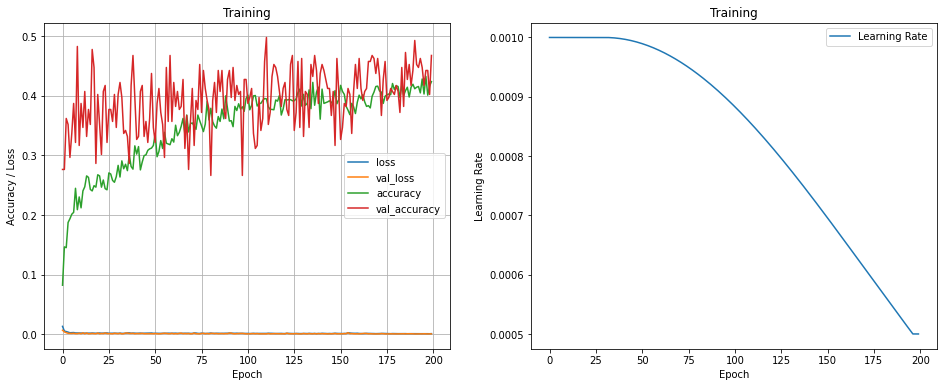

In [22]:
#Plot training accuracy and loss evolution and Learning Rate decay
#Recall, the learning rate is steady for the first n epochs, and then begins to decay exponentially.
fig, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].grid(True)

l1, = axes[0].plot(history.history['loss'], label='loss')
l2, = axes[0].plot(history.history['val_loss'], label='val_loss')
l3, = axes[0].plot(history.history['accuracy'], label='accuracy')
l4, = axes[0].plot(history.history['val_accuracy'], label='val_accuracy')
axes[0].legend(handles=[l1, l2, l3, l4])
axes[0].set_title('Training')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy / Loss')

l5, = axes[1].plot(history.history['lr'], label='Learning Rate')
axes[1].legend(handles=[l5])
axes[1].set_title('Training')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Learning Rate')
plt.show()

In [23]:
#Generate Predictions from Test dataset
predictions=model.predict(inputs_test)

7/7 [==============================] - 0s 12ms/step


In [24]:
#Inverse Transform to FEA magnitudes
outputs_test=out_scaler.inverse_transform(outputs_test)
predictions=out_scaler.inverse_transform(predictions)

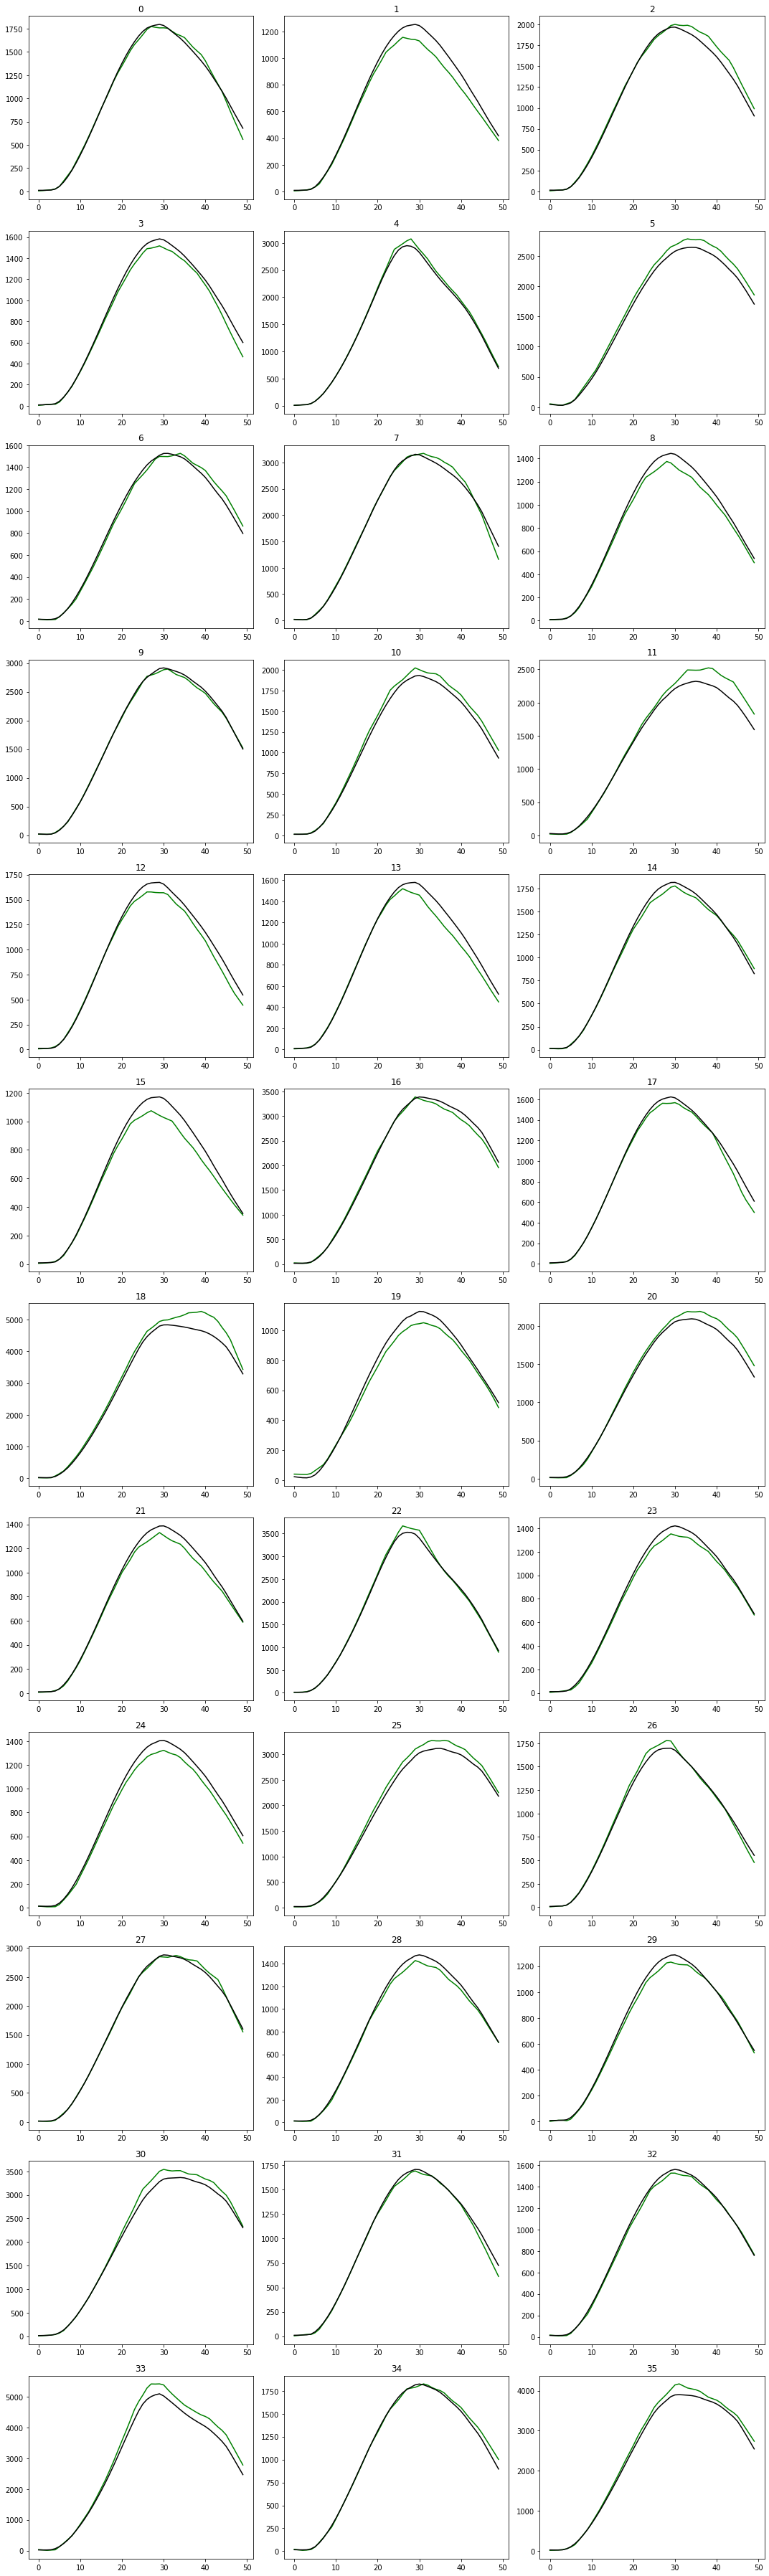

In [25]:
plt.figure(figsize=(15, 50))    
for i in range(36):
    ax = plt.subplot(12, 3, i + 1)
    l1 = plt.plot(outputs_test[i], '-g', label='true')
    l2 = plt.plot(predictions[i], '-k', label='pred')
    plt.title(str(i))
    #ax.legend(handles=[l1,l2])
    #plt.axis("off")
plt.tight_layout()

Text(0, 0.5, 'Predicted')

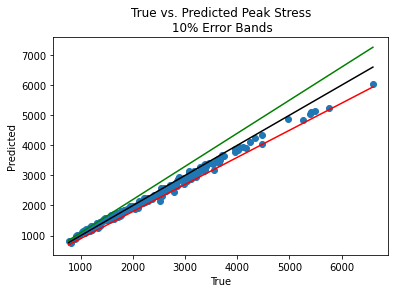

In [37]:
#Error plot
truemaxima=[]
predmaxima=[]
for i in range(predictions.shape[0]):
    truemaxima.append(outputs_test[i,:].max())
    predmaxima.append(predictions[i,:].max())
    
truemaxima=np.array(truemaxima)
predmaxima=np.array(predmaxima)

    
plt.scatter(truemaxima, predmaxima)
plt.plot([truemaxima.min(), truemaxima.max()], [truemaxima.min(), truemaxima.max()], '-k')

#Error band
err = .1
plt.plot([truemaxima.min(), truemaxima.max()], [(1+err)*truemaxima.min(), (1+err)*truemaxima.max()], '-g')
plt.plot([truemaxima.min(), truemaxima.max()], [(1-err)*truemaxima.min(), (1-err)*truemaxima.max()], '-r')

plt.title('True vs. Predicted Peak Stress\n 10% Error Bands')
plt.xlabel('True')
plt.ylabel('Predicted')